⭐ What is VARMAX?

VARMAX = VAR + MA + Exogenous Variables

✔ Multivariate forecasting
✔ Uses past values (AR)
✔ Uses past errors (MA)
✔ Uses external variables (X)
✔ More powerful than VAR

                                  Open         High          Low        Close  \
Date                                                                            
2024-01-01 00:00:00+05:30  1078.367886  1078.367886  1060.770554  1064.812500   
2024-01-02 00:00:00+05:30  1070.974097  1087.437802  1064.221074  1082.212769   
2024-01-03 00:00:00+05:30  1082.409874  1083.543621  1067.375718  1069.593872   
2024-01-04 00:00:00+05:30  1072.699368  1112.626144  1070.777015  1109.619385   
2024-01-05 00:00:00+05:30  1109.077186  1115.140165  1101.239755  1107.056152   
...                                ...          ...          ...          ...   
2024-12-27 00:00:00+05:30   895.364086   904.694956   892.386157   901.270325   
2024-12-30 00:00:00+05:30   901.270301   905.290494   892.088353   896.853027   
2024-12-31 00:00:00+05:30   892.386134   910.402630   886.529515   907.970642   
2025-01-01 00:00:00+05:30   906.283137   915.713246   904.297850   913.529419   
2025-01-02 00:00:00+05:30   

C:\Anaconda3\envs\ssai\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
C:\Anaconda3\envs\ssai\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                       Statespace Model Results                                       
Dep. Variable:     ['Open', 'High', 'Low', 'Close', 'Volume']   No. Observations:                  248
Model:                                             VARMA(2,1)   Log Likelihood                2582.420
                                                  + intercept   AIC                          -4974.840
Date:                                        Thu, 04 Dec 2025   BIC                          -4641.064
Time:                                                16:50:13   HQIC                         -4840.474
Sample:                                                     0                                         
                                                        - 248                                         
Covariance Type:                                          opg                                         
Ljung-Box (L1) (Q):     0.00, 0.01, 0.01, 0.00, 0.00   Jarque-Bera (JB): 

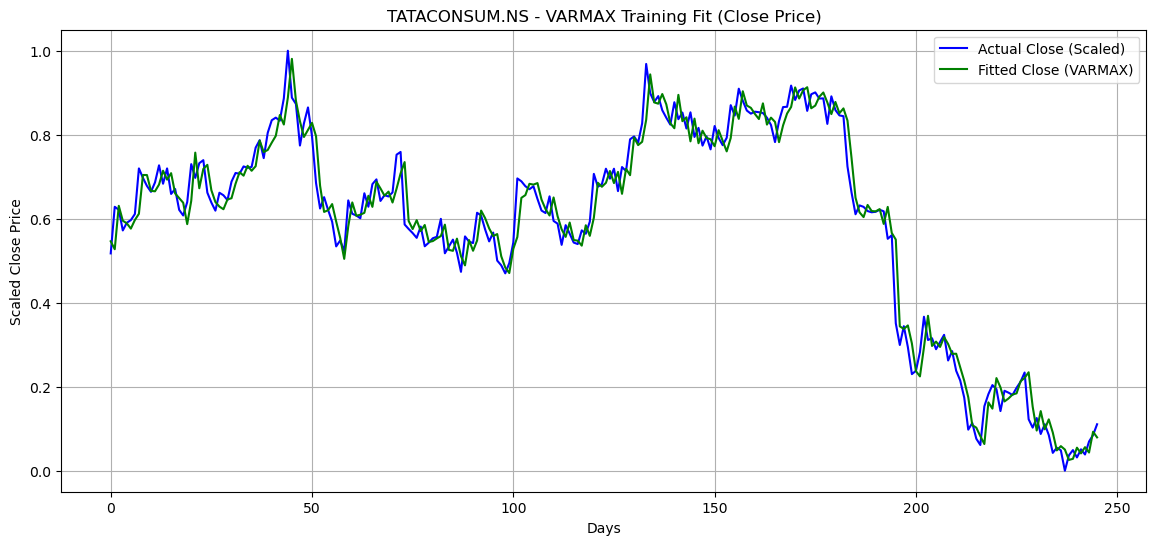


📈 NEXT 30 DAYS VARMAX FORECAST (REAL PRICES)

Day +1: ₹924.11
Day +2: ₹928.03
Day +3: ₹929.64
Day +4: ₹931.26
Day +5: ₹932.83
Day +6: ₹934.38
Day +7: ₹935.89
Day +8: ₹937.38
Day +9: ₹938.86
Day +10: ₹940.31
Day +11: ₹941.75
Day +12: ₹943.17
Day +13: ₹944.57
Day +14: ₹945.95
Day +15: ₹947.32
Day +16: ₹948.66
Day +17: ₹950.00
Day +18: ₹951.31
Day +19: ₹952.61
Day +20: ₹953.89
Day +21: ₹955.15
Day +22: ₹956.40
Day +23: ₹957.64
Day +24: ₹958.85
Day +25: ₹960.05
Day +26: ₹961.24
Day +27: ₹962.41
Day +28: ₹963.57
Day +29: ₹964.71
Day +30: ₹965.84


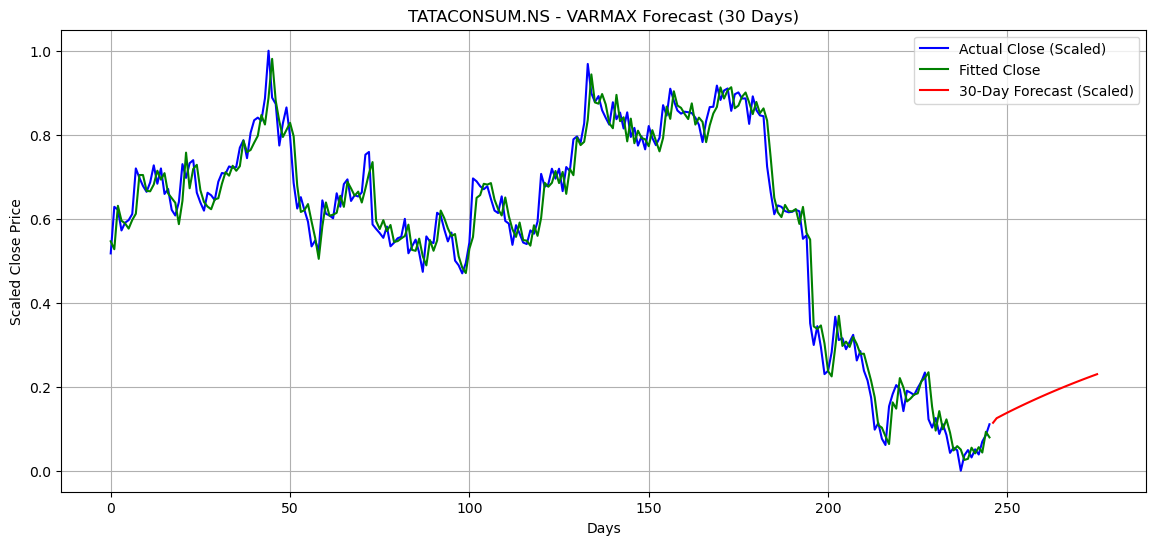

In [1]:
# ========================================================
# 0️⃣ IMPORT LIBRARIES
# ========================================================
import numpy as np
import yfinance as yf
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from statsmodels.tsa.statespace.varmax import VARMAX
import matplotlib.pyplot as plt


# ========================================================
# 1️⃣ DOWNLOAD DATA
# ========================================================
ticker = yf.Ticker("TATACONSUM.NS")
stk_data = ticker.history(start="2024-01-01", end="2025-01-03")

print(stk_data)
stk_data.info()


# ========================================================
# 2️⃣ PREPARE MULTIVARIATE DATA FOR VARMAX
# ========================================================
df = stk_data[["Open", "High", "Low", "Close", "Volume"]]

# Normalize all values
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)

print("Scaled Shape:", scaled_df.shape)


# ========================================================
# RMSE + MAPE FUNCTION
# ========================================================
def rmsemape(actual, predicted):
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mape = mean_absolute_percentage_error(actual, predicted)
    return rmse, mape


# ========================================================
# 3️⃣ TRAIN VARMAX MODEL
# ========================================================
print("\n==============================")
print("Training VARMAX Model...")
print("==============================\n")

# p = AR terms, q = MA terms
p = 2
q = 1

model = VARMAX(scaled_df, order=(p, q), enforce_stationarity=False)
model_fit = model.fit(disp=False)

print(model_fit.summary())


# ========================================================
# 4️⃣ FITTED VALUES
# ========================================================
fitted = model_fit.fittedvalues

# Align Close actual with fitted
actual_close = scaled_df["Close"].iloc[max(p, q):].values
pred_close = fitted["Close"].iloc[max(p, q):].values

rmse, mape = rmsemape(actual_close, pred_close)

print("\n==============================")
print("VARMAX MODEL PERFORMANCE (Close)")
print("==============================")
print(f"RMSE : {rmse:.6f}")
print(f"MAPE : {mape:.6f}")


# ========================================================
# 5️⃣ PLOT ACTUAL vs FITTED (Close Price)
# ========================================================
plt.figure(figsize=(14,6))
plt.plot(actual_close, label="Actual Close (Scaled)", color="blue")
plt.plot(pred_close, label="Fitted Close (VARMAX)", color="green")

plt.title("TATACONSUM.NS - VARMAX Training Fit (Close Price)")
plt.xlabel("Days")
plt.ylabel("Scaled Close Price")
plt.legend()
plt.grid()
plt.show()


# ========================================================
# 6️⃣ FORECAST NEXT 30 DAYS
# ========================================================
future_steps = 30

last_values = scaled_df.values[-max(p, q):]

forecast_scaled = model_fit.forecast(steps=future_steps)

# Convert Close to real price
inverse_full = scaler.inverse_transform(forecast_scaled)
forecast_real_close = inverse_full[:, 3]  # Close column


print("\n==============================")
print("📈 NEXT 30 DAYS VARMAX FORECAST (REAL PRICES)")
print("==============================\n")

for i, price in enumerate(forecast_real_close):
    print(f"Day +{i+1}: ₹{price:.2f}")


# ========================================================
# 7️⃣ FORECAST PLOT
# ========================================================
plt.figure(figsize=(14,6))

plt.plot(actual_close, label="Actual Close (Scaled)", color="blue")
plt.plot(pred_close, label="Fitted Close", color="green")

forecast_index = range(len(actual_close), len(actual_close) + future_steps)
plt.plot(forecast_index, forecast_scaled["Close"], 
         label="30-Day Forecast (Scaled)", color="red")

plt.title("TATACONSUM.NS - VARMAX Forecast (30 Days)")
plt.xlabel("Days")
plt.ylabel("Scaled Close Price")
plt.legend()
plt.grid()
plt.show()
